# Iteration 0
# Phishing Link Detection Machine Learning

Jonathan Christyadi (502705) - AI Core 02


This notebook aims at predicting the likelihood of a link being a phishing link or a legitimate link with a focus on exploring and testing hypotheses that necessitate further research.


Dataset: https://data.mendeley.com/datasets/c2gw7fy2j4/3

In [119]:
import sklearn
import pandas as pd
import seaborn
import numpy as np
print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("pandas version:", pd.__version__)            # 1.5.1
print("seaborn version:", seaborn.__version__)          # 0.12.1

scikit-learn version: 1.4.1.post1
pandas version: 2.2.1
seaborn version: 0.13.2


# 📦 Data provisioning

After loading the dataset, I found out some inconsistencies among the data. First the label of the link (phishing or legitimate) can be changed into binary format. Also, for domain_with_copyright column, some are in binary and some are written in alphabets, for example: zero, One, etc.

In [120]:
df = pd.read_csv("Data\dataset_link_phishing.csv", sep=',', index_col=False, dtype='unicode')
df.head()

id                                                url url_length  \
0  0     http://www.progarchives.com/album.asp?id=61737         46   
1  1  http://signin.eday.co.uk.ws.edayisapi.dllsign....        128   
2  2  http://www.avevaconstruction.com/blesstool/ima...         52   
3  3                              http://www.jp519.com/         21   
4  4                       https://www.velocidrone.com/         28   

  hostname_length ip total_of. total_of- total_of@ total_of? total_of&  \
0              20  0         3         0         0         1         0   
1             120  0        10         0         0         0         0   
2              25  0         3         0         0         0         0   
3              13  0         2         0         0         0         0   
4              19  0         2         0         0         0         0   

  total_of= total_of_ total_of~ total_of% total_of/ total_of* total_of:  \
0         1         0         0         0         3         0         1   
1         0         0         0         0         3         0         1   
2         0         0         0         0         4         0         1   
3         0         0         0         0         3         0         1   
4         0         0         0         0         3         0         1   

  total_of, total_of; total_of$ total_of_www total_of_com  \
0         0         0         0            1            0   
1         0         0         0            0            0   
2         0         0         0            1            0   
3         0         0         0            1            0   
4         0         0         0            1            0   

  total_of_http_in_path https_token ratio_digits_url ratio_digits_host  \
0                     0           1      0.108695652                 0   
1                     0           1        0.0546875       0.058333333   
2                     0           1                0                 0   
3                     0           1      0.142857143       0.230769231   
4                     0           0                0                 0   

  punycode port tld_in_path tld_in_subdomain abnormal_subdomain nb_subdomains  \
0        0    0           0                0                  0             3   
1        0    0           0                0                  0             3   
2        0    0           0                0                  0             3   
3        0    0           0                0                  0             2   
4        0    0           0                0                  0             2   

  prefix_suffix random_domain shortening_service path_extension  \
0             0             0                  0              0   
1             0             0                  0              0   
2             0             0                  0              0   
3             0             1                  0              0   
4             0             0                  0              0   

  nb_redirection nb_external_redirection length_words_raw char_repeat  \
0              0                       0                6           3   
1              0                       0               10           6   
2              1                       0                5           5   
3              0                       0                2           3   
4              0                       0                2           3   

  shortest_words_raw shortest_word_host shortest_word_path longest_words_raw  \
0                  2                  3                  2                12   
1                  2                  2                  0                35   
2                  3                  3                  3                17   
3                  3                  3                  0                 5   
4                  3                  3                  0                11   

  longest_word_host longest_word_path avg_words_raw avg_word_ho

In [121]:
# Taking a look at the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          19431 non-null  object
 1   url                         19431 non-null  object
 2   url_length                  19431 non-null  object
 3   hostname_length             19431 non-null  object
 4   ip                          19431 non-null  object
 5   total_of.                   19431 non-null  object
 6   total_of-                   19431 non-null  object
 7   total_of@                   19431 non-null  object
 8   total_of?                   19431 non-null  object
 9   total_of&                   19431 non-null  object
 10  total_of=                   19431 non-null  object
 11  total_of_                   19431 non-null  object
 12  total_of~                   19431 non-null  object
 13  total_of%                   19431 non-null  ob

In [122]:
# Sampling the dataset
df.sample(10)

id                                                url url_length  \
612     612     http://www.abbreviations.com/RAILROAD%20SWITCH         46   
8802    801                            http://fience.vot.pl/ry         23   
11062  3061                               https://www.kj-1.de/         20   
2590   2590  http://mesquecamping.es/modules/new_one_drive2...         57   
11271  3270  https://support-appleld.com.secureupdate.duila...        125   
8426    425                http://maria.sgpermata.com/Main.htm         35   
11682  3681             http://londondanceschool.com/apps.html         38   
3617   3617  https://20200803165502-dot-res4po1ns5ive.rj.r....         70   
9285   1284  http://www.avclub.com/article/mickey-mouse-clu...         87   
16151  8150                    http://www.nepa3d.com/NewestDB/         31   

      hostname_length ip total_of. total_of- total_of@ total_of? total_of&  \
612                21  0         2         0         0         0         0   
8802               13  1         2         0         0         0         0   
11062              11  1         2         1         0         0         0   
2590               16  0         2         0         0         0         0   
11271              50  1         4         1         0         1         2   
8426               19  1         3         0         0         0         0   
11682              21  1         2         0         0         0         0   
3617               49  1         5         2         0         0         0   
9285               14  1         2         7         0         0         0   
16151              14  1         2         0         0         0         0   

      total_of= total_of_ total_of~ total_of% total_of/ total_of* total_of:  \
612           0         0         0         1         3         0         1   
8802          0         0         0         0         3         0         1   
11062         0         0         0         0         3         0         1   
2590          0         2         0         0         5         0         1   
11271         3         2         0         0         4         0         1   
8426          0         0         0         0         3         0         1   
11682         0         0         0         0         3         0         1   
3617          0         0         0         0         4         0         1   
9285          0         0         0         0         4         0         1   
16151         0         0         0         0         4         0         1   

      total_of, total_of; total_of$ total_of_www total_of_com  \
612           0         0         0            1            0   
8802          0         0         0            0            0   
11062         0         0         0            1            0   
2590          0         0         0            0            0   
11271         0         0         0            0            1   
8426          0         0         0            0            0   
11682         0         0         0            0            0   
3617          0         0         0            0            0   
9285          0         0         0            1            0   
16151         0         0         0            1            0   

      total_of_http_in_path https_token ratio_digits_url ratio_digits_host  \
612                       0           1      0.043478261                 0   
8802                      0           1                0                 0   
11062                     0           0             0.05       0.090909091   
2590                      0           1       0.01754386                 0   
11271                     0           0            0.136                 0   
8426                      0           1                0                 0   
11682                     0           1                0                 0   
3617                      0           0      0.242857143       0.346938776   
9285          

# Preprocessing

## 🆔 Encoding


After understanding the data on the sample, I found that some data are not in a good form and there is a room for improvement, such as the `domain_with_copyright` and `status` columns.

In [123]:
df['status'].unique()

array(['phishing', 'legitimate'], dtype=object)

As you can see on the status column, there are only 2 values, phishing and legitimate. Which mean I can transform it into binary values (0 and 1). 

In [124]:
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})
df.head()

id                                                url url_length  \
0  0     http://www.progarchives.com/album.asp?id=61737         46   
1  1  http://signin.eday.co.uk.ws.edayisapi.dllsign....        128   
2  2  http://www.avevaconstruction.com/blesstool/ima...         52   
3  3                              http://www.jp519.com/         21   
4  4                       https://www.velocidrone.com/         28   

  hostname_length ip total_of. total_of- total_of@ total_of? total_of&  \
0              20  0         3         0         0         1         0   
1             120  0        10         0         0         0         0   
2              25  0         3         0         0         0         0   
3              13  0         2         0         0         0         0   
4              19  0         2         0         0         0         0   

  total_of= total_of_ total_of~ total_of% total_of/ total_of* total_of:  \
0         1         0         0         0         3         0         1   
1         0         0         0         0         3         0         1   
2         0         0         0         0         4         0         1   
3         0         0         0         0         3         0         1   
4         0         0         0         0         3         0         1   

  total_of, total_of; total_of$ total_of_www total_of_com  \
0         0         0         0            1            0   
1         0         0         0            0            0   
2         0         0         0            1            0   
3         0         0         0            1            0   
4         0         0         0            1            0   

  total_of_http_in_path https_token ratio_digits_url ratio_digits_host  \
0                     0           1      0.108695652                 0   
1                     0           1        0.0546875       0.058333333   
2                     0           1                0                 0   
3                     0           1      0.142857143       0.230769231   
4                     0           0                0                 0   

  punycode port tld_in_path tld_in_subdomain abnormal_subdomain nb_subdomains  \
0        0    0           0                0                  0             3   
1        0    0           0                0                  0             3   
2        0    0           0                0                  0             3   
3        0    0           0                0                  0             2   
4        0    0           0                0                  0             2   

  prefix_suffix random_domain shortening_service path_extension  \
0             0             0                  0              0   
1             0             0                  0              0   
2             0             0                  0              0   
3             0             1                  0              0   
4             0             0                  0              0   

  nb_redirection nb_external_redirection length_words_raw char_repeat  \
0              0                       0                6           3   
1              0                       0               10           6   
2              1                       0                5           5   
3              0                       0                2           3   
4              0                       0                2           3   

  shortest_words_raw shortest_word_host shortest_word_path longest_words_raw  \
0                  2                  3                  2                12   
1                  2                  2                  0                35   
2                  3                  3                  3                17   
3                  3                  3                  0                 5   
4                  3                  3                  0                11   

  longest_word_host longest_word_path avg_words_raw avg_word_ho

After a closer look, I spotted that there are some inconsistencies with the value on `domain_with_copyright` column, for example One and one. Similarly, I want to transform it into binary value 0 and 1, instead of the string

In [125]:
df['domain_with_copyright'].unique()

array(['one', 'zero', 'One', 'Zero', '1', '0'], dtype=object)

In [126]:
df['domain_with_copyright'] = df['domain_with_copyright'].map({'one': 1, 'zero': 0, 'Zero': 0, 'One': 1,'1': 1, '0': 0}).astype(int)
df['domain_with_copyright'].unique()

array([1, 0])

### Checking null or NaN values

In [127]:
# Calculate the total number of missing values in the DataFrame
total_na = df.isna().sum()

In [128]:
# Calculate the total number of missing values in the DataFrame
total_null = df.isnull().sum()
total_null.sum()

0

Making a function to check which feature contain binary values.

In [129]:
# Finding columns with binary values

def count_binary_columns(df):
    results = []
    counter = 0
    for col in df.columns:
        counter += 1
        if df[col].isin([0, 1]).all():
            results.append(col)
    return results, counter


count_binary_columns(df)

(['domain_with_copyright', 'status'], 87)

In [130]:
df = df.drop(columns=['id', 'url'])
df.head()

url_length hostname_length ip total_of. total_of- total_of@ total_of?  \
0         46              20  0         3         0         0         1   
1        128             120  0        10         0         0         0   
2         52              25  0         3         0         0         0   
3         21              13  0         2         0         0         0   
4         28              19  0         2         0         0         0   

  total_of& total_of= total_of_ total_of~ total_of% total_of/ total_of*  \
0         0         1         0         0         0         3         0   
1         0         0         0         0         0         3         0   
2         0         0         0         0         0         4         0   
3         0         0         0         0         0         3         0   
4         0         0         0         0         0         3         0   

  total_of: total_of, total_of; total_of$ total_of_www total_of_com  \
0         1         0         0         0            1            0   
1         1         0         0         0            0            0   
2         1         0         0         0            1            0   
3         1         0         0         0            1            0   
4         1         0         0         0            1            0   

  total_of_http_in_path https_token ratio_digits_url ratio_digits_host  \
0                     0           1      0.108695652                 0   
1                     0           1        0.0546875       0.058333333   
2                     0           1                0                 0   
3                     0           1      0.142857143       0.230769231   
4                     0           0                0                 0   

  punycode port tld_in_path tld_in_subdomain abnormal_subdomain nb_subdomains  \
0        0    0           0                0                  0             3   
1        0    0           0                0                  0             3   
2        0    0           0                0                  0             3   
3        0    0           0                0                  0             2   
4        0    0           0                0                  0             2   

  prefix_suffix random_domain shortening_service path_extension  \
0             0             0                  0              0   
1             0             0                  0              0   
2             0             0                  0              0   
3             0             1                  0              0   
4             0             0                  0              0   

  nb_redirection nb_external_redirection length_words_raw char_repeat  \
0              0                       0                6           3   
1              0                       0               10           6   
2              1                       0                5           5   
3              0                       0                2           3   
4              0                       0                2           3   

  shortest_words_raw shortest_word_host shortest_word_path longest_words_raw  \
0                  2                  3                  2                12   
1                  2                  2                  0                35   
2                  3                  3                  3                17   
3                  3                  3                  0                 5   
4                  3                  3                  0                11   

  longest_word_host longest_word_path avg_words_raw avg_word_host  \
0                12                 5             5           7.5   
1                35                 0          10.7          10.7   
2                17                 9           7.4            10   
3                 5                 0             4             4   
4                11                 0             7             7   

  a

In [131]:
df['whois_registered_domain'].unique()

array(['0', '1'], dtype=object)

status
0    9716
1    9715
Name: count, dtype: int64


<Axes: title={'center': 'Count the target variable'}, xlabel='status'>

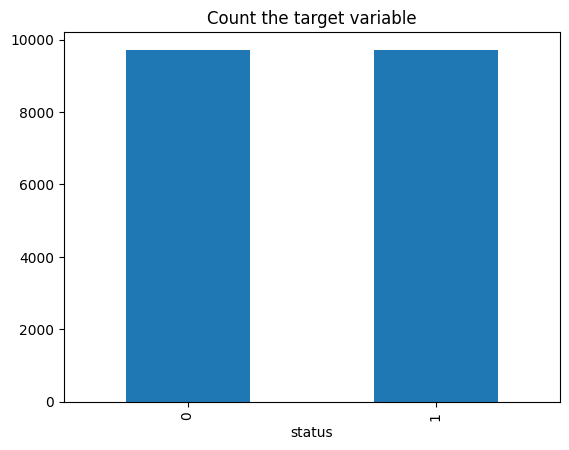

In [132]:
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='bar', title='Count the target variable')    


# 💡 Feature selection

A heatmap will be used to select a suitable set of features to predict the `status` target upon. At this stage, I have zero idea which feature to use and I utilized heatmap to find features with the most corellation with the target feature.

### Data Visualization

First, to determine which feature to be used on the model, I want to visualize the correlation of the features.

### Creating a heatmap to visualize the correlation between the features


In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(100, 100))
plot = sns.heatmap(corr, annot=True, fmt='.2f', linewidths=2)


### Sorting the feature correlation values

To select the most suitable features for predicting the target variable (status), a heatmap was created to visualize the correlation between the features. By analyzing the heatmap, we can identify the features that have the highest positive or negative correlation with the target variable.

### Features Plot Bar

Now I want to make a bar plot of the correlation with the target variable, which helps me to identify the important featueres, understand the relationship and simplify it.

In [134]:
# Sorting the correlation values with the target variable in descending order
corr.drop('status').sort_values(by='status', ascending=False).plot.bar(y='status', title='Correlation with the target variable', figsize=(20, 10))

<Axes: title={'center': 'Correlation with the target variable'}>

### Finding the most correlated features with the target variable based on numerical values

It can be seen on the plot bar that there are alot of features, I want to narrow it down by finding features with the most correlation in terms of numerical value.

In [135]:
# Finding the most correlated features with the target variable based on numerical featrures excluding NaN values
correlation_matrix = df.corr(numeric_only=True)
sorted_corr = correlation_matrix.sort_values(by='status',ascending=False)
sorted_corr

domain_with_copyright    status
status                             -0.175469  1.000000
domain_with_copyright               1.000000 -0.175469

#### Displaying the top correlated features along with their correlation values.

On the left side is the feature name and on the right side is the correlation values which indicates the strength and direction of the correlation between each features and target variable

In [136]:
# Get all the correlated features with the target variable
num_features = len(sorted_corr['status']) # 15 features
sorted_corr['status'].head(num_features)

status                   1.000000
domain_with_copyright   -0.175469
Name: status, dtype: float64

#### Selecting the features

Now I can utilize the features (except the target variable) with the most correlation into the model.

In [137]:
# List the features from the previous step into a list
selected_features = ['google_index', 'ratio_digits_url', 'domain_in_title', 'phish_hints', 'total_of?', 'url_length', 'total_of/','hostname_length','total_of.', 'total_of-','domain_with_copyright','nb_hyperlinks','total_of_www','page_rank']
df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')

# Check the data types of the selected columns after conversion
print(df[selected_features].dtypes)

# Check if 'status' column exists and has categorical or numerical data
print(df['status'].dtype)

# Create a DataFrame with the selected columns
selected_df = df[selected_features + ['status']]
selected_df.head()

google_index               int64
ratio_digits_url         float64
domain_in_title            int64
phish_hints                int64
total_of?                  int64
url_length                 int64
total_of/                  int64
hostname_length            int64
total_of.                  int64
total_of-                  int64
domain_with_copyright      int32
nb_hyperlinks              int64
total_of_www               int64
page_rank                  int64
dtype: object
int64


google_index  ratio_digits_url  domain_in_title  phish_hints  total_of?  \
0             0          0.108696                1            0          1   
1             1          0.054688                1            2          0   
2             1          0.000000                1            0          0   
3             0          0.142857                1            0          0   
4             0          0.000000                0            0          0   

   url_length  total_of/  hostname_length  total_of.  total_of-  \
0          46          3               20          3          0   
1         128          3              120         10          0   
2          52          4               25          3          0   
3          21          3               13          2          0   
4          28          3               19          2          0   

   domain_with_copyright  nb_hyperlinks  total_of_www  page_rank  status  
0                      1            143             1          5       1  
1                      0              0             0          0       1  
2                      0              3             1          0       1  
3                      1            404             1          0       0  
4                      0             57             1          4       0

In [138]:
# Count the number of binary columns in the selected features
features_binary = count_binary_columns(df[selected_features])
features_binary


(['google_index', 'domain_in_title', 'domain_with_copyright'], 14)

#### Data Scaling

Now I scale the data appropriately.

In [139]:
# from sklearn.preprocessing import StandardScaler
# # Scale the data
# selected_df = selected_df.dropna()
# scaler = StandardScaler()
# selected_df[selected_features] = scaler.fit_transform(selected_df[selected_features])


#### Pairplot

Visualize the correlations, distributions, and patterns between multiple variables in the dataset. 

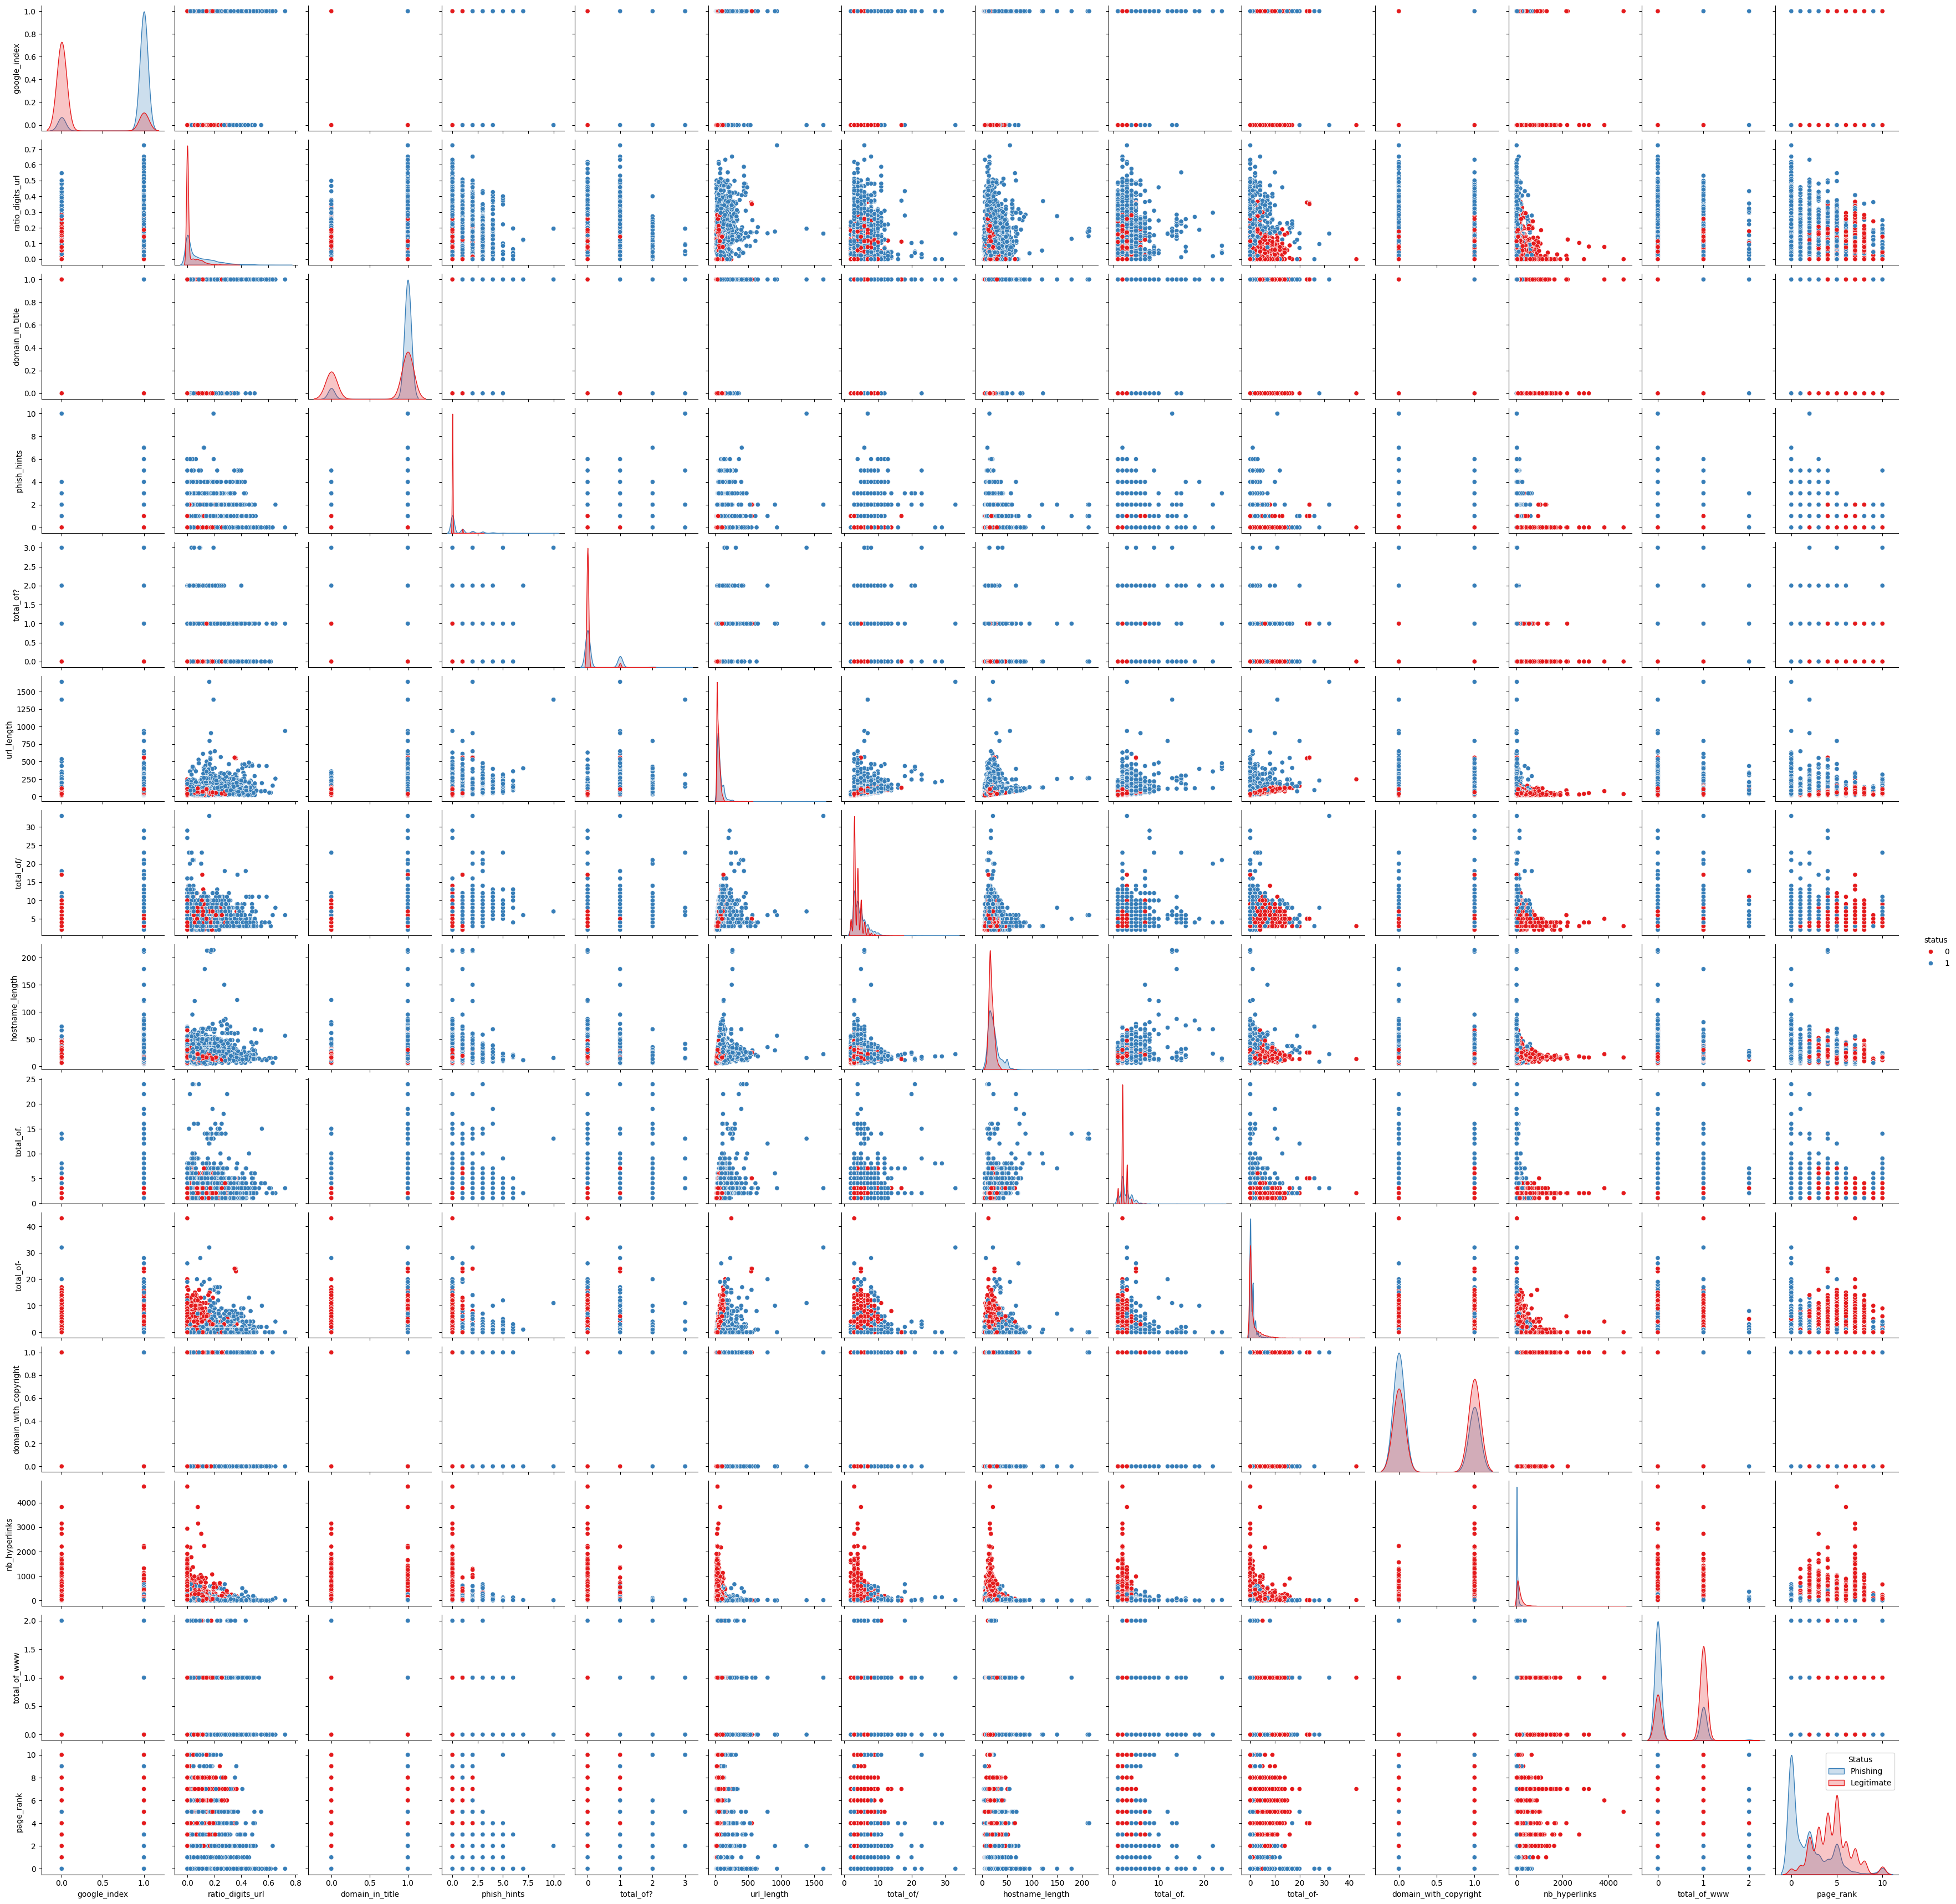

In [140]:
# Create pairplot
sns.pairplot(selected_df, hue='status', palette='Set1')

# Add legends
plt.legend(title='Status', labels=['Phishing', 'Legitimate'])

# Show the plot
plt.show()

#### Defining target variable and feature variables

In this section I want to split the target and feature variables into X and y.

In [ ]:
target = 'status'

X = df[selected_features]
y = df[target]

## 🪓 Splitting into train/test

Splitting the train and test set 80% and 20% respectively. So around 15.5k are in train set and 4k in test set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 19431 observations, of which 15544 are now in the train set, and 3887 in the test set.


# 🧬 Modelling

In this section, I want to try a few different models and how they perform compared to other models. Also, at the end I will stack some of the models. 


### Support Vector Machine

This code trains a Support Vector Machine (SVM) classifier, a powerful algorithm used for classification tasks. The SVM learns to classify data points into different categories based on their features.

In [ ]:
# SUPPORT VECTOR MACHINE SVM
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
SVM_score = SVM.score(X_test, y_test)
print("Accuracy:", SVM_score)

Accuracy: 0.8389503473115513


This code generates a classification report for the predictions made by a Support Vector Machine (SVM) model.

In [ ]:
from sklearn.metrics import classification_report
predictions = SVM.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1972
           1       0.82      0.87      0.84      1915

    accuracy                           0.84      3887
   macro avg       0.84      0.84      0.84      3887
weighted avg       0.84      0.84      0.84      3887



### Linear Regression

This code trains a Linear Regression model, which is a simple method used for predicting numeric values based on input features.

In [ ]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_score = linear.score(X_test, y_test)
print("R²:", linear_score)

R²: 0.7034221652376609


In [ ]:
predictions_linear = linear.predict(X_test)
report_linear = classification_report(y_test, predictions_linear.round())
print(report_linear)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.92      0.90      0.91      1972
         1.0       0.90      0.92      0.91      1915
         2.0       0.00      0.00      0.00         0

    accuracy                           0.91      3887
   macro avg       0.46      0.46      0.46      3887
weighted avg       0.91      0.91      0.91      3887



C:\Users\jochr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jochr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jochr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: Unde

### 🏘️ K-NEAREST NEIGBOURS

This code implements the K-Nearest Neighbors (KNN) classification algorithm. KNN works by finding the 'k' nearest data points in the training set to a given input, and the majority class among those neighbors is assigned to the input.

In [ ]:
# K-NEAREST NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)
KNN_score = KNN.score(X_test, y_test)
print("Accuracy:", KNN_score)

Accuracy: 0.9133007460766658


In [ ]:
predictions_KNN = KNN.predict(X_test)
report_KNN = classification_report(y_test, predictions_KNN)
print(report_KNN)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1972
           1       0.94      0.88      0.91      1915

    accuracy                           0.91      3887
   macro avg       0.92      0.91      0.91      3887
weighted avg       0.92      0.91      0.91      3887



### 🌲Decision Tree

This code trains a decision tree classifier, a type of machine learning model used for classification tasks. Then, it evaluates the accuracy of the model on test data and prints the accuracy score.

In [ ]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(min_samples_leaf=40, min_samples_split=300)
decision_tree.fit(X_train, y_train)
DT_score = decision_tree.score(X_test, y_test)
print("Accuracy:", DT_score)

Accuracy: 0.9297658862876255


In [ ]:
predictions_DT = decision_tree.predict(X_test)
report_DT = classification_report(y_test, predictions_DT)
print(report_DT)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1972
           1       0.92      0.94      0.93      1915

    accuracy                           0.93      3887
   macro avg       0.93      0.93      0.93      3887
weighted avg       0.93      0.93      0.93      3887



This code visualizes a decision tree model using a graphical representation. It sets up target names for the classes ("phishing" and "legitimate")

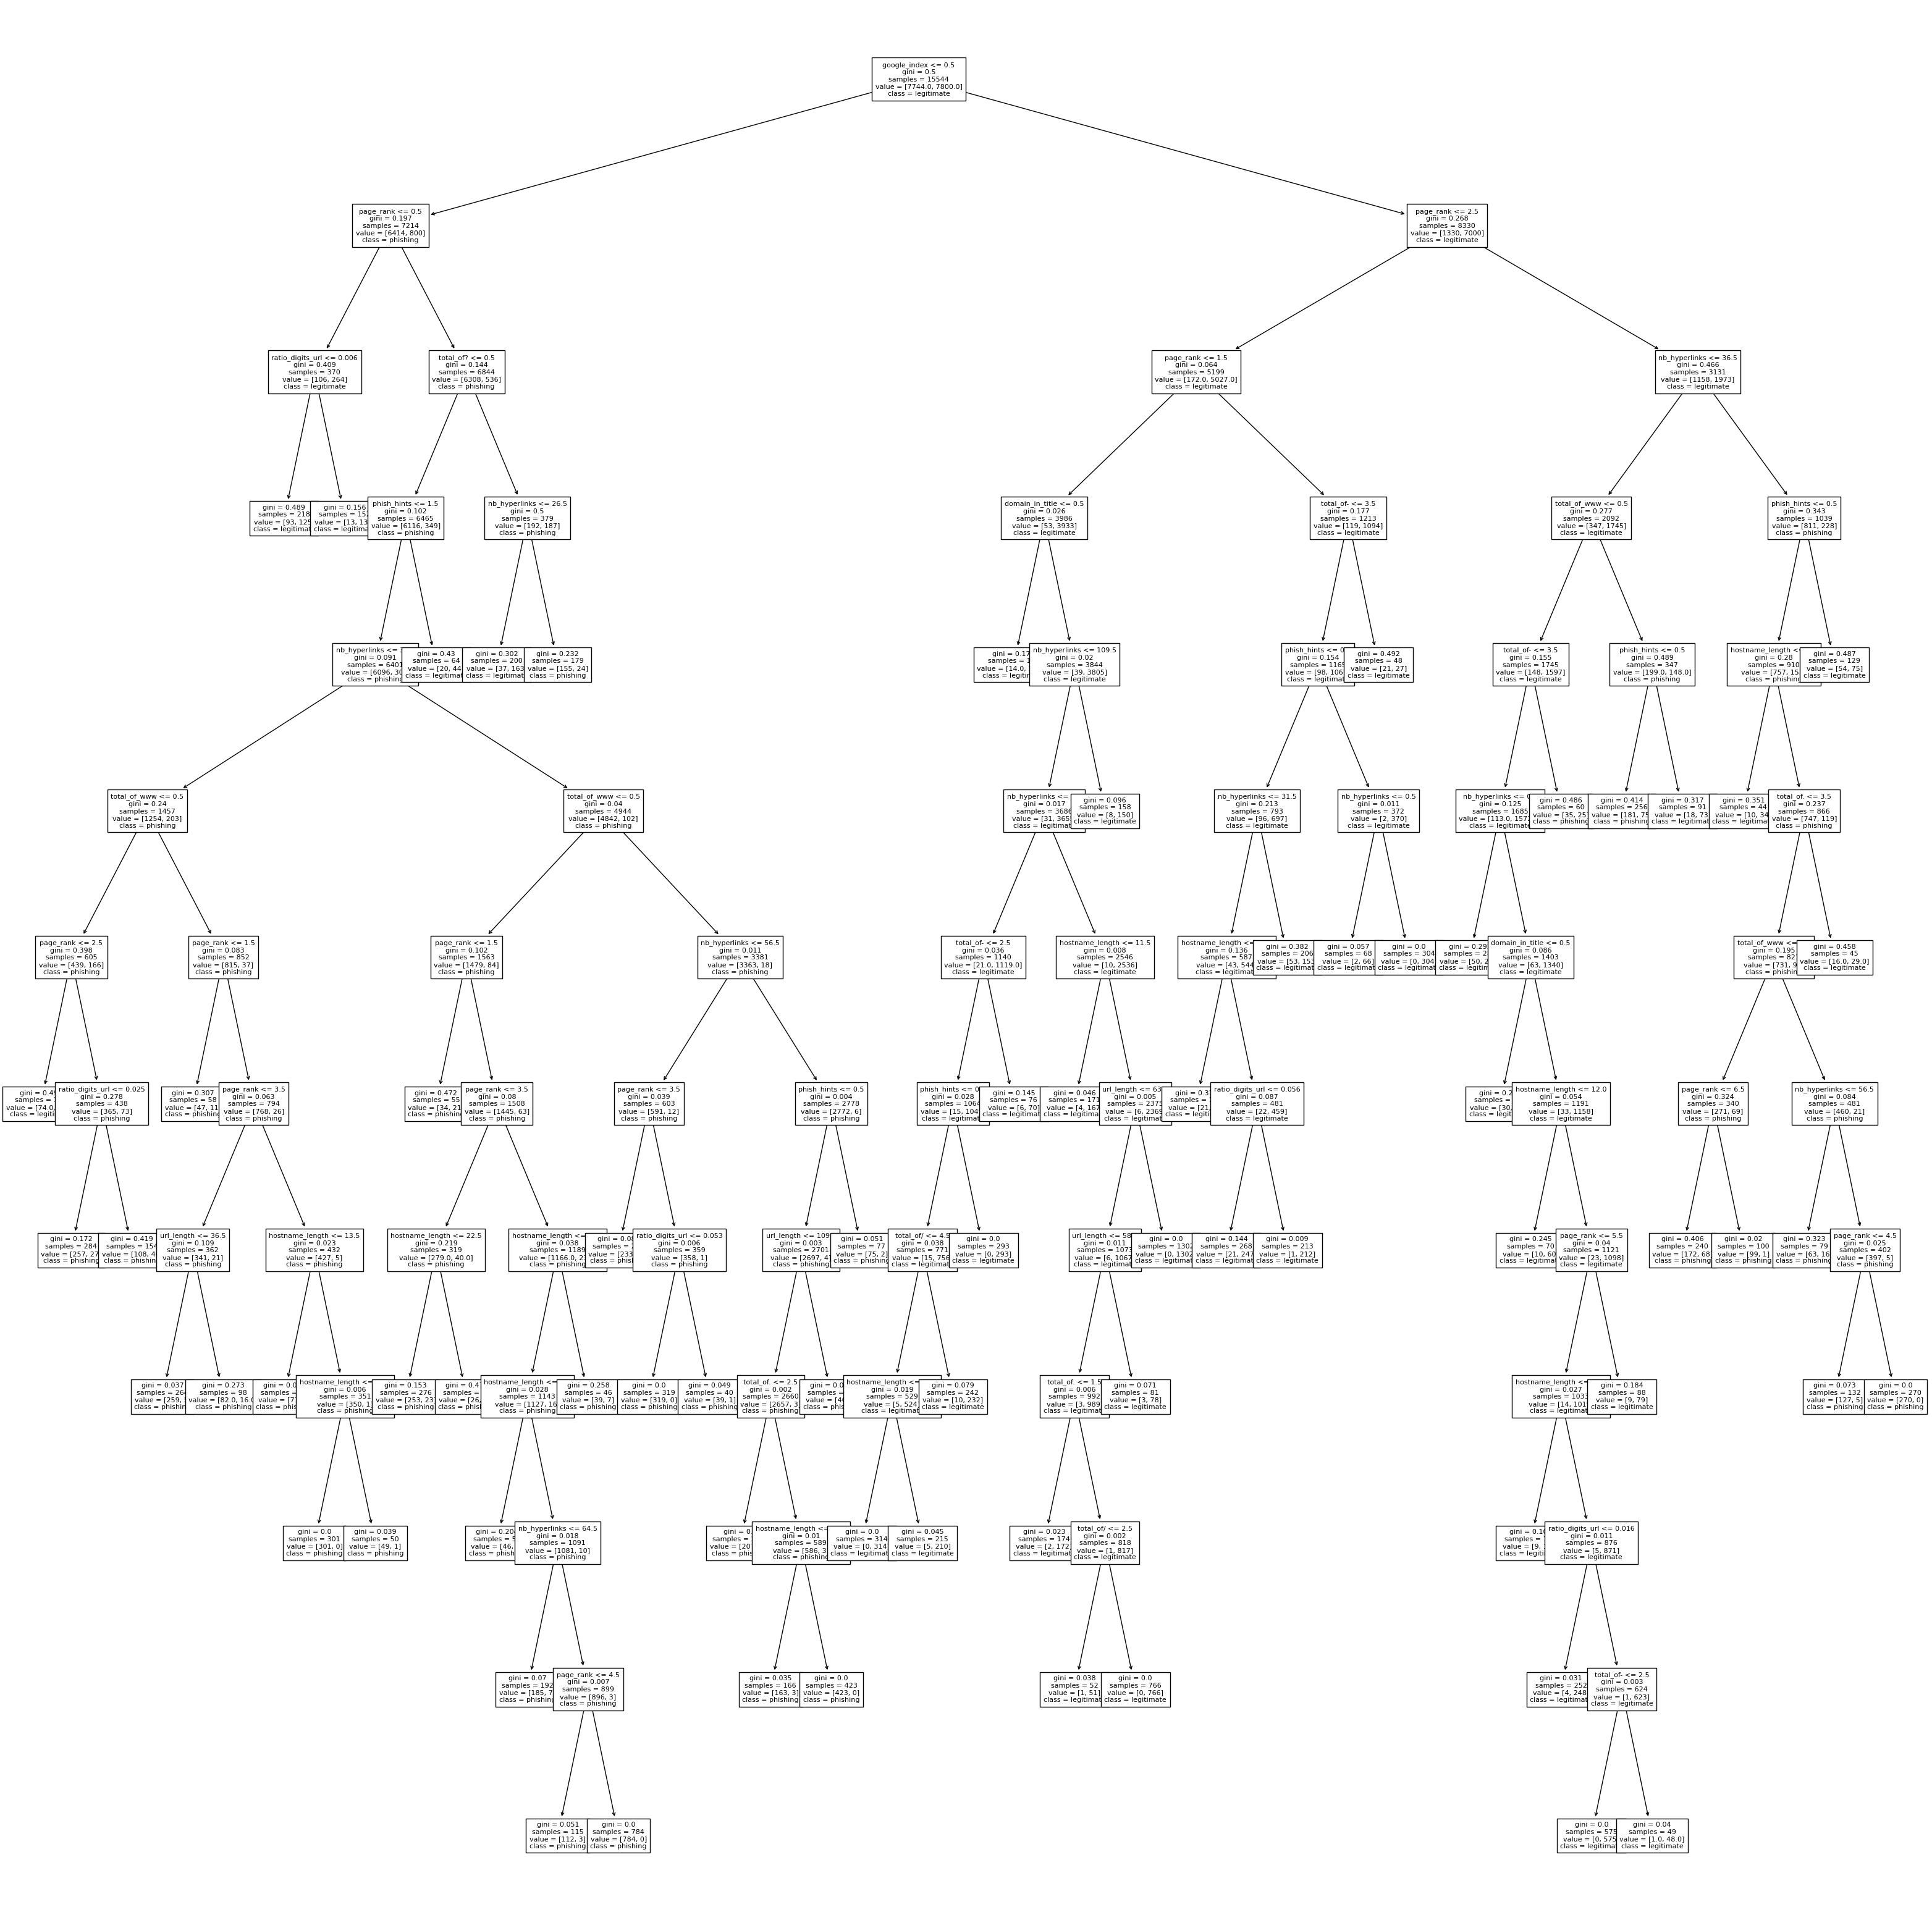

In [ ]:
target_names = ["phishing", "legitimate"]
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
from sklearn.tree import plot_tree
plot_tree(decision_tree, fontsize=8, feature_names=selected_features, class_names=target_names)
plt.show()

## 🌳 Decision Tree with ADA Boosting

Boost the decision tree with ADA boosting and turns out, the performance (accuracy) increases by 2%.

In [ ]:
# AdaBoost with decision trees
from sklearn.ensemble import AdaBoostRegressor
adaboost_decision_tree = AdaBoostRegressor(estimator=decision_tree, n_estimators=50, random_state=21)
X_train = X_train.astype(float) 
y_train = y_train.astype(float)
adaboost_decision_tree.fit(X_train, y_train)
ada_dt_score = adaboost_decision_tree.score(X_test, y_test)
print("Accuracy:", ada_dt_score)

Accuracy: 0.948535369851551


In [ ]:
predictions_ada_dt = adaboost_decision_tree.predict(X_test)
report_ada_dt = classification_report(y_test, predictions_ada_dt.round())
print(report_ada_dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1972
           1       0.98      0.99      0.99      1915

    accuracy                           0.99      3887
   macro avg       0.99      0.99      0.99      3887
weighted avg       0.99      0.99      0.99      3887



## 🌳🌳🌳 Random Forest Regressor


This code uses a machine learning method called Random Forest, which creates a powerful model by combining many decision trees. It trains this model with training data and evaluates its accuracy with test data, displaying the accuracy score.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 500, max_depth=25, n_jobs=-1)
random_forest.fit(X_train, y_train)
rf_score = random_forest.score(X_test, y_test)
print("Accuracy:", rf_score)

Accuracy: 0.9520342184645083


In [ ]:
predictions_rf = random_forest.predict(X_test)
report_rf = classification_report(y_test, predictions_rf.round())
print(report_rf)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1972
           1       0.99      0.99      0.99      1915

    accuracy                           0.99      3887
   macro avg       0.99      0.99      0.99      3887
weighted avg       0.99      0.99      0.99      3887



## 🌳🌳🌳 Random Forest with ADA Boosting

This code sets up a method called AdaBoost with Random Forest, a technique that boosts the performance of a random forest model. It trains this boosted model with training data and evaluates its accuracy with test data, displaying the accuracy score.

In [149]:
# AdaBoost with Random Forest
from sklearn.ensemble import AdaBoostRegressor

adaboost_random_forest = AdaBoostRegressor(estimator=random_forest, n_estimators=50, random_state=21)
adaboost_random_forest.fit(X_train, y_train)
ada_rf_score = adaboost_random_forest.score(X_test, y_test)
print("Accuracy:", ada_rf_score)

Accuracy: 0.9682058408419513


In [ ]:
predictions_ada_rf = adaboost_random_forest.predict(X_test)
report_ada_rf = classification_report(y_test, predictions_ada_rf.round())
print(report_ada_rf)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1972
           1       0.99      0.99      0.99      1915

    accuracy                           0.99      3887
   macro avg       0.99      0.99      0.99      3887
weighted avg       0.99      0.99      0.99      3887



# Apply Stacking


This code combines different prediction methods (like linear regression and random forest) into one super method called Stacking Regressor. It learns from data and gives a score showing how accurate its predictions are.

In [ ]:
from sklearn.ensemble import StackingRegressor

# A list of tuples with the name of the model and the model itself
estimators_list = [
    ('linear_regression', linear),
    ('random_forest', random_forest),
    ('adaboost', adaboost_decision_tree),
    ('adaboost_random_forest', adaboost_random_forest)
]

stacking_regressor = StackingRegressor(estimators=estimators_list, final_estimator=RandomForestRegressor(n_estimators=50, max_depth=25, n_jobs=-1))
stacking_regressor.fit(X_train, y_train)
stack_regressor_score = stacking_regressor.score(X_test, y_test)
print("Accuracy:", stack_regressor_score)

Accuracy: 0.9651448587271408


In [ ]:
predictions_stack_regressor = stacking_regressor.predict(X_test)
report_stack_regressor = classification_report(y_test, predictions_stack_regressor.round())
print(report_stack_regressor)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1972
           1       0.99      0.99      0.99      1915

    accuracy                           0.99      3887
   macro avg       0.99      0.99      0.99      3887
weighted avg       0.99      0.99      0.99      3887



# Comparing the performance of different models. 

It prints a comparison report displaying each model's performance score. Finally, it identifies the best performing model by finding the model with the highest score and prints its name along with its score.

In [ ]:
# List of models and their scores
model_scores = {
    "Linear Regression": linear_score,
    "Decision Tree": DT_score,
    "Random Forest": rf_score,
    "K-Nearest Neighbors": KNN_score,
    "Support Vector Machine (SVM)": SVM_score,
    "Decison Tree with AdaBoost": ada_dt_score,
    "Random Forest with AdaBoost": ada_rf_score,
    "Stacking Regressor": stack_regressor_score
}

# Print comparison report
print("Model Comparison Report:")
print("=========================")
for model, score in model_scores.items():
    print(f"{model}: {score:.4f}")

# Find the best performing model
best_model = max(model_scores, key=model_scores.get)
print(f"\nThe best performing model is: {best_model} with a score of {model_scores[best_model]:.4f}")


Model Comparison Report:
Linear Regression: 0.7034
Decision Tree: 0.9298
Random Forest: 0.9520
K-Nearest Neighbors: 0.9133
Support Vector Machine (SVM): 0.8390
Decison Tree with AdaBoost: 0.9485
Random Forest with AdaBoost: 0.9682
Stacking Regressor: 0.9651

The best performing model is: Random Forest with AdaBoost with a score of 0.9682


In [ ]:
# Define the classification reports for each model
reports = {
    'AdaBoost Decision Tree': report_ada_dt,
    'AdaBoost Random Forest': report_ada_rf,
    'Decision Tree': report_DT,
    'Random Forest': report_rf,
    'K-Nearest Neighbors': report_KNN,
    'Support Vector Machine (SVM)': report,
    'Linear Regression': report_linear,
    'Stack Regression': report_stack_regressor
}

# Print the comparison report
for model, report in reports.items():
    print(f"Classification Report for {model}:")
    print(report)


Classification Report for AdaBoost Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1972
           1       0.98      0.99      0.99      1915

    accuracy                           0.99      3887
   macro avg       0.99      0.99      0.99      3887
weighted avg       0.99      0.99      0.99      3887

Classification Report for AdaBoost Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1972
           1       0.99      0.99      0.99      1915

    accuracy                           0.99      3887
   macro avg       0.99      0.99      0.99      3887
weighted avg       0.99      0.99      0.99      3887

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1972
           1       0.92      0.94      0.93      1915

    accuracy                           0.

In [ ]:
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Extract model names and scores
models = [x[0] for x in sorted_scores]
scores = [x[1] for x in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')
plt.xlabel('Scores')
plt.title('Model Performance Comparison')
plt.gca().invert_yaxis()  # Invert y-axis to display the model with the highest score at the top

# Add total score labels to the bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.2f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

### Classification Report Performance Comparison

In this part, I want to make a graph that compares the classification report from each models into a grouped bar graph. This is mainly to visualize the performance score in the classification report.

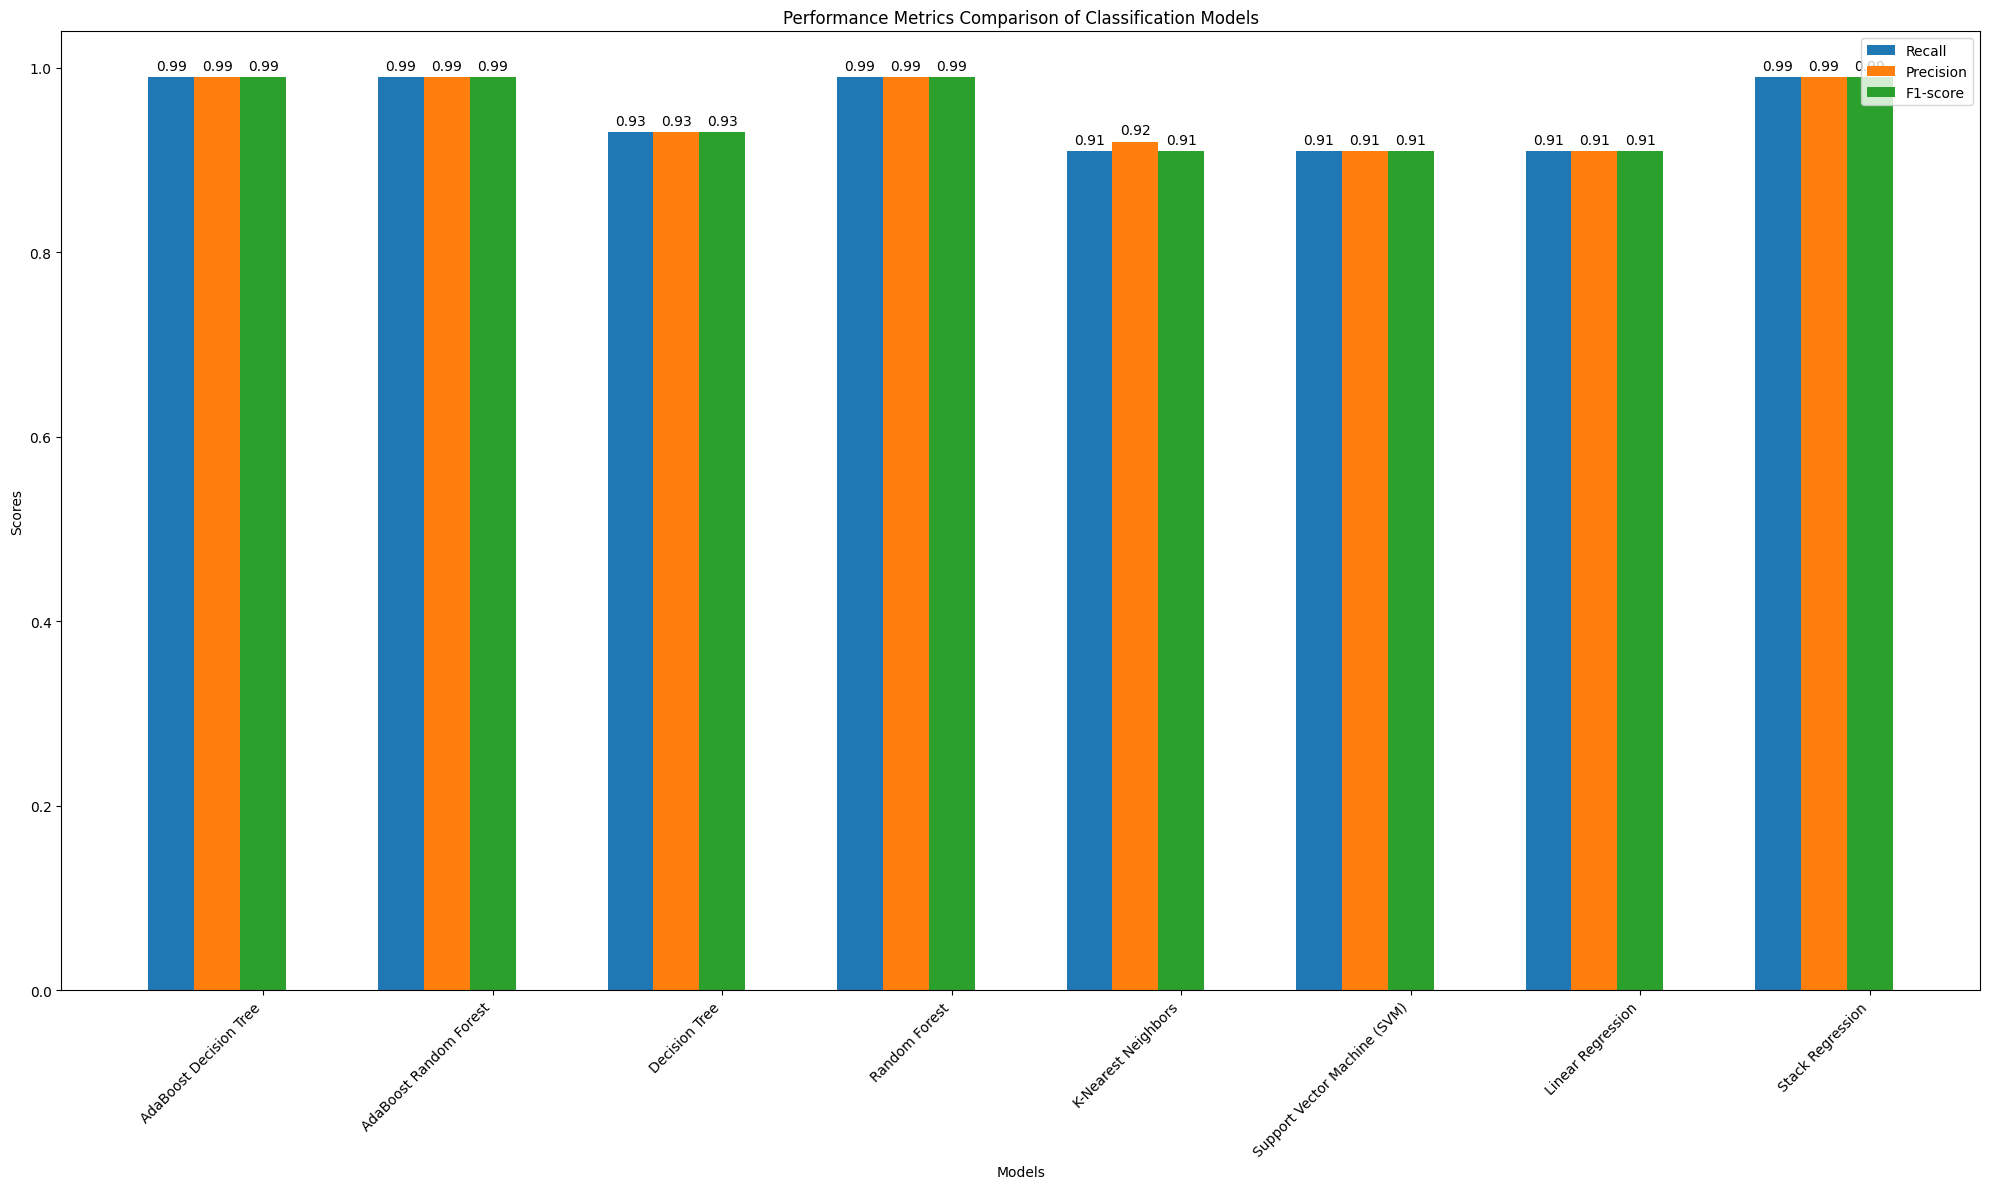

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Hardcoded data
models = ['AdaBoost Decision Tree', 'AdaBoost Random Forest', 'Decision Tree', 'Random Forest', 
          'K-Nearest Neighbors', 'Support Vector Machine (SVM)', 'Linear Regression', 'Stack Regression']
recalls = [0.99, 0.99, 0.93, 0.99, 0.91, 0.91, 0.91, 0.99]
precisions = [0.99, 0.99, 0.93, 0.99, 0.92, 0.91, 0.91, 0.99]
f1_scores = [0.99, 0.99, 0.93, 0.99, 0.91, 0.91, 0.91, 0.99]

# Plotting
num_models = len(models)
num_metrics = 4
bar_width = 0.2
index = np.arange(num_models)

fig, ax = plt.subplots(figsize=(20,12))

for i, (metric, values) in enumerate(zip(['Recall', 'Precision', 'F1-score'], [recalls, precisions, f1_scores])):
    bars = ax.bar(index + i * bar_width, values, bar_width, label=metric)
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison of Classification Models')
ax.set_xticks(index + (num_metrics / 2) * bar_width)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


# Conclusion

In conclusion, I found out that there are 2 best models, random forest with ADA boost and stack regressor with the exact same accuracy, precision, recall, and f-1 score. Both models have 97% accuracy and 99% on the rest. The high precision and recall indicates that both models can predicts effictively both false positives and false negatives, which mean the performance is balanced and high tuned. Also, it is not biasing towards one or another class.


# Phase 4 (User Input)

In [219]:
# Function to preprocess the data from the user inputs
def preprocess_data_from_inputs():
    # Initialize an empty dictionary to store feature values
    features = {}
    
    # Prompt the user to input values for each feature
    for feature in selected_features:
        value = input("Enter value for {}: ".format(feature))
        features[feature] = value
    
    # Create a DataFrame with the user inputs
    df = pd.DataFrame([features], columns=selected_features)
    
    return df
    
# Function to make predictions based on the user inputs
def predict_from_inputs():
    # Call the preprocess_data_from_inputs function to get the user inputs
    processed_data = preprocess_data_from_inputs()
        
    # Make predictions using the model
    predictions = model.predict(processed_data)
        
    return predictions




In [230]:
sample = df[selected_features].sample(1)
def predict_from_df(df):
    # Make predictions using the model
    predictions = model.predict(df)
        
    return predictions


# Map whether the predicted URL is a phishing link or not based on the prediction probability

selected_df = df.loc[sample.index].copy()
selected_df['status'] = df['status'].map({1: 'Phishing', 0: 'Legitimate'})
selected_df

url_length  hostname_length ip  total_of.  total_of- total_of@  \
17619          35               20  1          2          0         0   

       total_of? total_of& total_of= total_of_ total_of~ total_of%  total_of/  \
17619          0         0         0         0         0         0          4   

      total_of* total_of: total_of, total_of; total_of$  total_of_www  \
17619         0         1         0         0         0             1   

      total_of_com total_of_http_in_path https_token  ratio_digits_url  \
17619            0                     0           1               0.0   

      ratio_digits_host punycode port tld_in_path tld_in_subdomain  \
17619                 0        0    0           0                0   

      abnormal_subdomain nb_subdomains prefix_suffix random_domain  \
17619                  0             2             0             0   

      shortening_service path_extension nb_redirection  \
17619                  0              0              0   

      nb_external_redirection length_words_raw char_repeat shortest_words_raw  \
17619                       0                3           3                  3   

      shortest_word_host shortest_word_path longest_words_raw  \
17619                  3                  6                12   

      longest_word_host longest_word_path avg_words_raw avg_word_host  \
17619                12                 6             7           7.5   

      avg_word_path  phish_hints domain_in_brand brand_in_subdomain  \
17619             6            0               0                  0   

      brand_in_path suspecious_tld statistical_report  nb_hyperlinks  \
17619             0              0                  0              8   

      ratio_intHyperlinks ratio_extHyperlinks ratio_nullHyperlinks nb_extCSS  \
17619               0.375               0.625                    0         0   

      ratio_intRedirection ratio_extRedirection ratio_intErrors  \
17619                    0                    0               0   

      ratio_extErrors login_form external_favicon links_in_tags submit_email  \
17619               0          0                1            50            0   

      ratio_intMedia ratio_extMedia sfh iframe popup_window safe_anchor  \
17619              0            100   0      0            0           0   

      onmouseover right_clic empty_title  domain_in_title  \
17619           0          0           0                1   

       domain_with_copyright whois_registered_domain  \
17619                      0                       0   

      domain_registration_length domain_age web_traffic dns_record  \
17619                        519        212           0          0   

       google_index  page_rank    status  
17619             1          0  Phishing

In [231]:
# Call the predict_from_inputs function to make predictions
predictions = predict_from_df(sample)

# Extract prediction probability and convert it to a percentage
prediction_in_percentage = predictions.item() * 100

# Print the prediction result

print("Predictions: {:.2f}% chance of being a phishing link".format(prediction_in_percentage))

Predictions: 98.20% chance of being a phishing link


In [227]:
df[selected_features].columns.tolist()

['google_index',
 'ratio_digits_url',
 'domain_in_title',
 'phish_hints',
 'total_of?',
 'url_length',
 'total_of/',
 'hostname_length',
 'total_of.',
 'total_of-',
 'domain_with_copyright',
 'nb_hyperlinks',
 'total_of_www',
 'page_rank']

In [239]:
import requests
import re
from bs4 import BeautifulSoup
from urllib.parse import urlparse
from urllib.parse import urlencode

def domain_in_title(domain, title):
    if domain.lower() in title.lower(): 
        return 0
    return 1

def domain_with_copyright(domain, content):
    try:
        m = re.search(u'(\N{COPYRIGHT SIGN}|\N{TRADE MARK SIGN}|\N{REGISTERED SIGN})', content)
        _copyright = content[m.span()[0]-50:m.span()[0]+50]
        if domain.lower() in _copyright.lower():
            return 0
        else:
            return 1 
    except:
        return 0

def page_rank(domain):
    url = 'https://openpagerank.com/api/v1.0/getPageRank?domains%5B0%5D=' + domain
    try:
        request = requests.get(url, headers={'API-OPR': "sksss4cw4soc8o00cg4ggsgcc88cccsk80oscs00"})
        result = request.json()
        result = result['response'][0]['page_rank_integer']
        if result:
            return result
        else:
            return 0
    except:
        return -1

def google_index(url):
    #time.sleep(.6)
    user_agent =  'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/48.0.2564.116 Safari/537.36'
    headers = {'User-Agent' : user_agent}
    query = {'q': 'site:' + url}
    google = "https://www.google.com/search?" + urlencode(query)
    data = requests.get(google, headers=headers)
    data.encoding = 'ISO-8859-1'
    soup = BeautifulSoup(str(data.content), "html.parser")
    try:
        if 'Our systems have detected unusual traffic from your computer network.' in str(soup):
            return -1
        check = soup.find(id="rso").find("div").find("div").find("a")
        #print(check)
        if check and check['href']:
            return 0
        else:
            return 1
        
    except AttributeError:
        return 1

def ratio_digits_url(hostname):
    return len(re.sub("[^0-9]", "", hostname))/len(hostname)

def phish_hints(url_path):
    HINTS = ['wp', 'login', 'includes', 'admin', 'content', 'site', 'images', 'js', 'alibaba', 'css', 'myaccount', 'dropbox', 'themes', 'plugins', 'signin', 'view']
    count = 0
    for hint in HINTS:
        count += url_path.lower().count(hint)
    return count

def url_length(url):
    return len(url) 

def total_www(words_raw):
        count = 0
        for word in words_raw:
            if not word.find('www') == -1:
                count += 1
        return count

def total_of_question_mark(base_url):
    return base_url.count('?')

def total_of_slash(full_url):
    return full_url.count('/')

def total_of_dot(full_url):
    return full_url.count('.')

In [240]:
page_rank("http://www.progarchives.com/")

''